# Hybrid Writeup
Here we will generate examples of hybrid images, using the 5 combinations.

In [1]:
import cv2
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from utils import vis_hybrid_image, load_image, save_image, im_range
from student_code import my_imfilter, create_hybrid_image
%load_ext autoreload
%autoreload 2

In [2]:
pairs=[('../data/dog.bmp', '../data/cat.bmp'),
       ('../data/bicycle.bmp', '../data/motorcycle.bmp'),
       ('../data/marilyn.bmp', '../data/einstein.bmp'),
       ('../data/fish.bmp', '../data/submarine.bmp'),
       ('../data/plane.bmp', '../data/bird.bmp')]

cutoff_frequency=7
filter=cv2.getGaussianKernel(ksize=cutoff_frequency*4+1,sigma=cutoff_frequency)
filter=np.dot(filter,filter.T)

In [3]:
def extract_filename(path):
    return path.split('/')[-1].split('.')[0]

# do some tests
print(extract_filename(pairs[0][0]))
print(extract_filename(pairs[0][1]))

def generate_hybrid_name(pair,reverse=False):
    if reverse:
        return extract_filename(pair[1])+'_low_'+extract_filename(pair[0])+'_high_hybrid.png'
    else:
        return extract_filename(pair[0])+'_low_'+extract_filename(pair[1])+'_high_hybrid.png'

dog
cat


# Define Auto-hybrid function

In [4]:
def auto_hybrid(pair,filter):# Here we just use the same filter for both images
    image1=load_image(pair[0])
    image2=load_image(pair[1])

    low1,high1,hybrid_image1=create_hybrid_image(image1,image2,filter)
    low2,high2,hybrid_image2=create_hybrid_image(image2,image1,filter)

    vis1=vis_hybrid_image(hybrid_image1)
    vis2=vis_hybrid_image(hybrid_image2)

    save_image('../results/'+generate_hybrid_name(pair),hybrid_image1)
    save_image('../results/'+generate_hybrid_name(pair,True),hybrid_image2)

    return low1,high1,low2,high2,vis1,vis2,hybrid_image1,hybrid_image2

Then we generate all pairs of hybrid images(also exchange high pass and low pass).

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3471423..0.64849925].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.0914986..1.1686828].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.3691307..0.72558975].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.15197007..1.3478149].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.6408602..0.8358964].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.27669325..1.746182].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.787

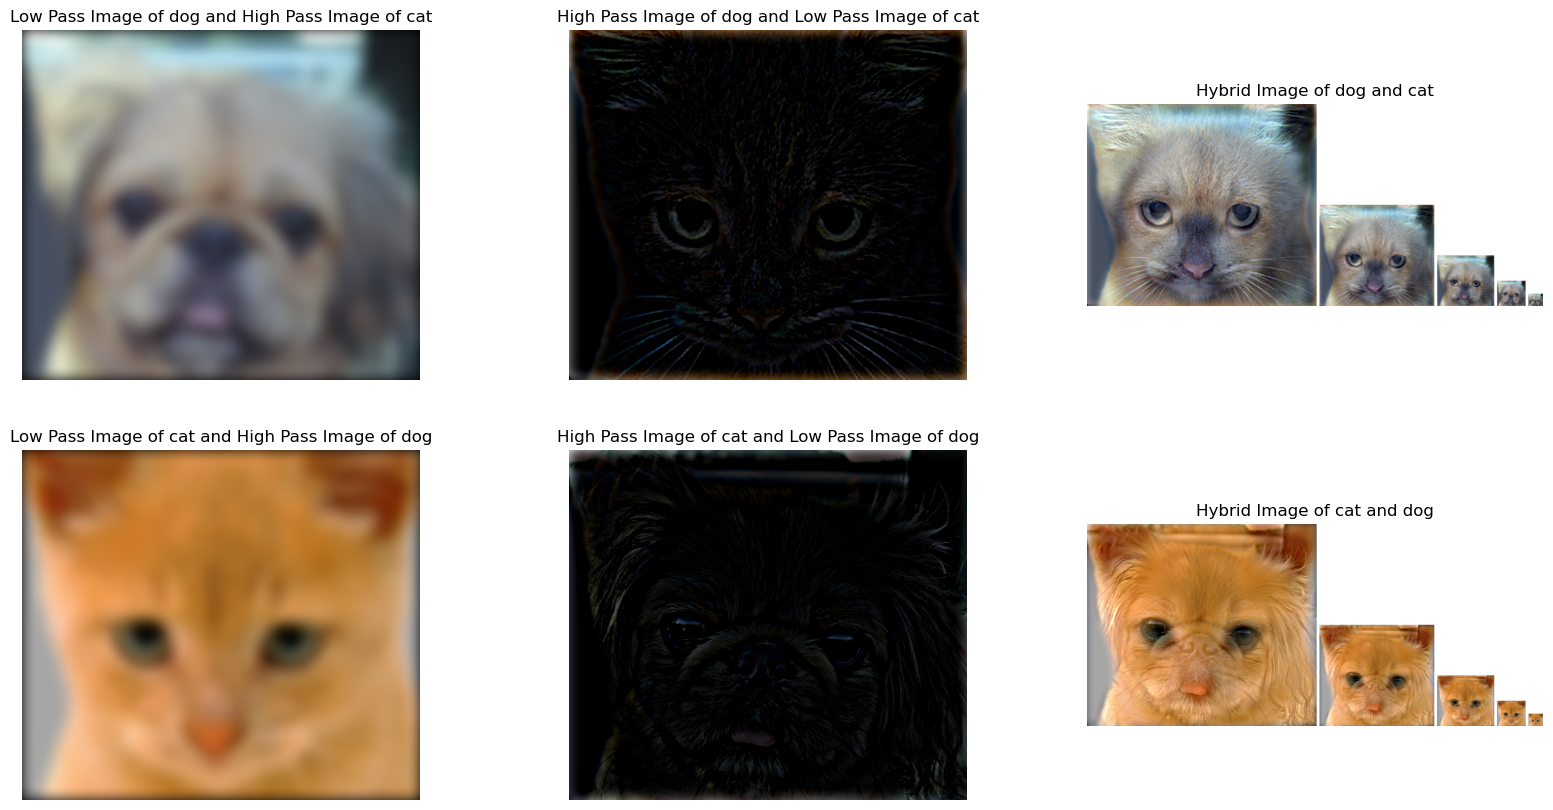

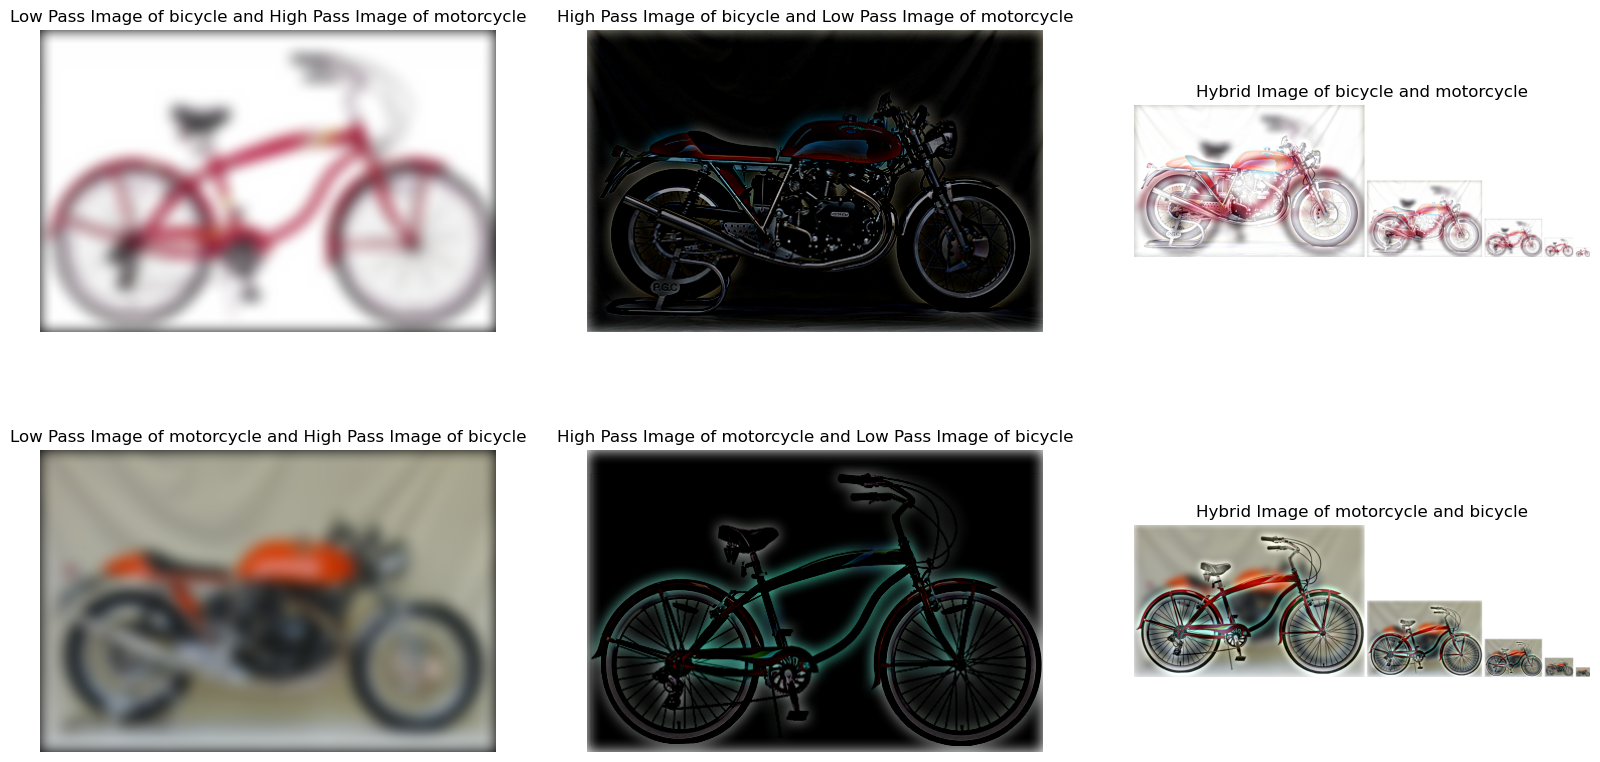

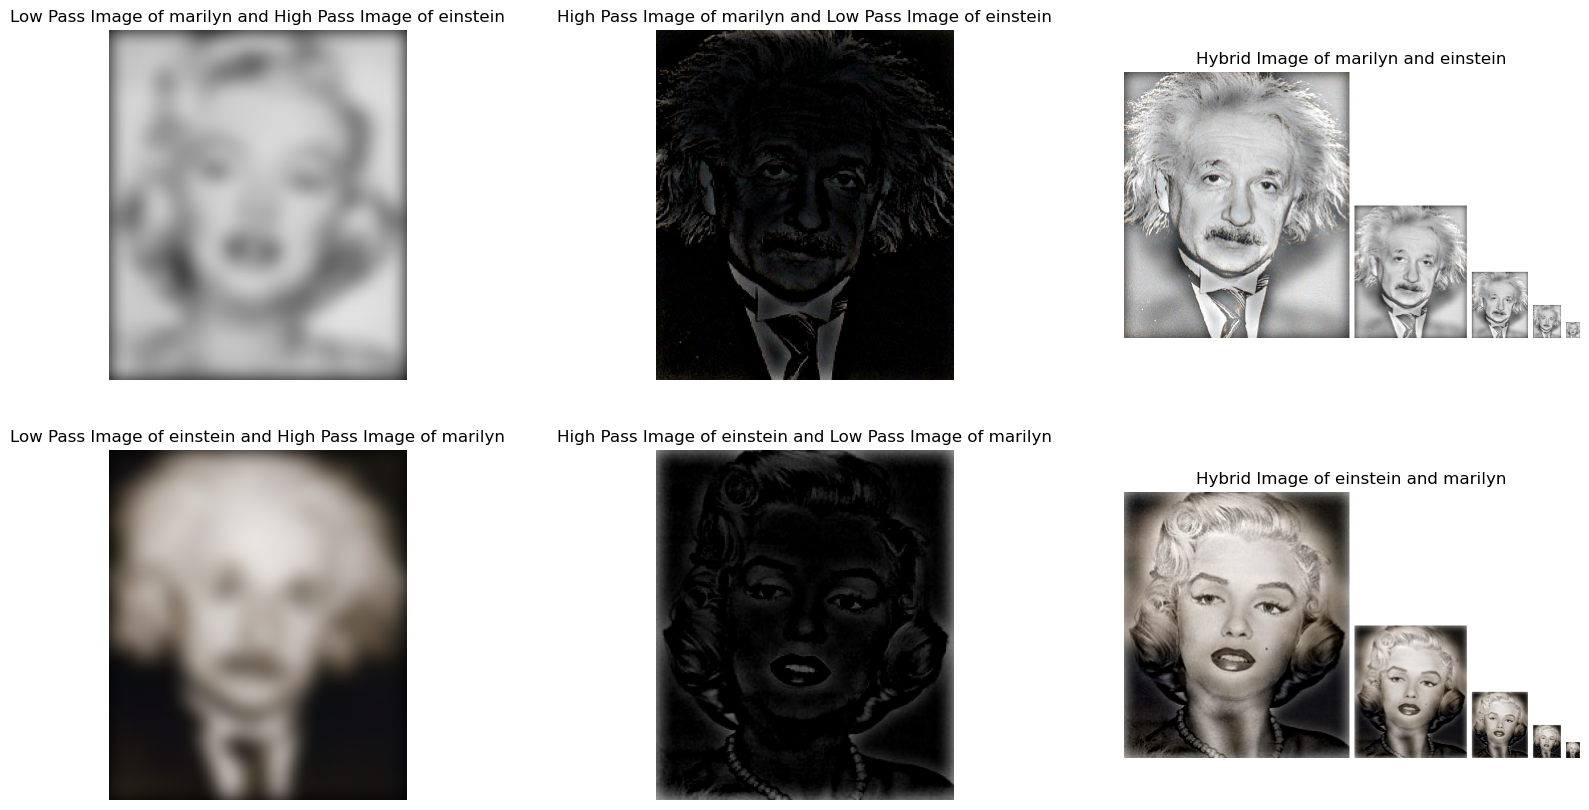

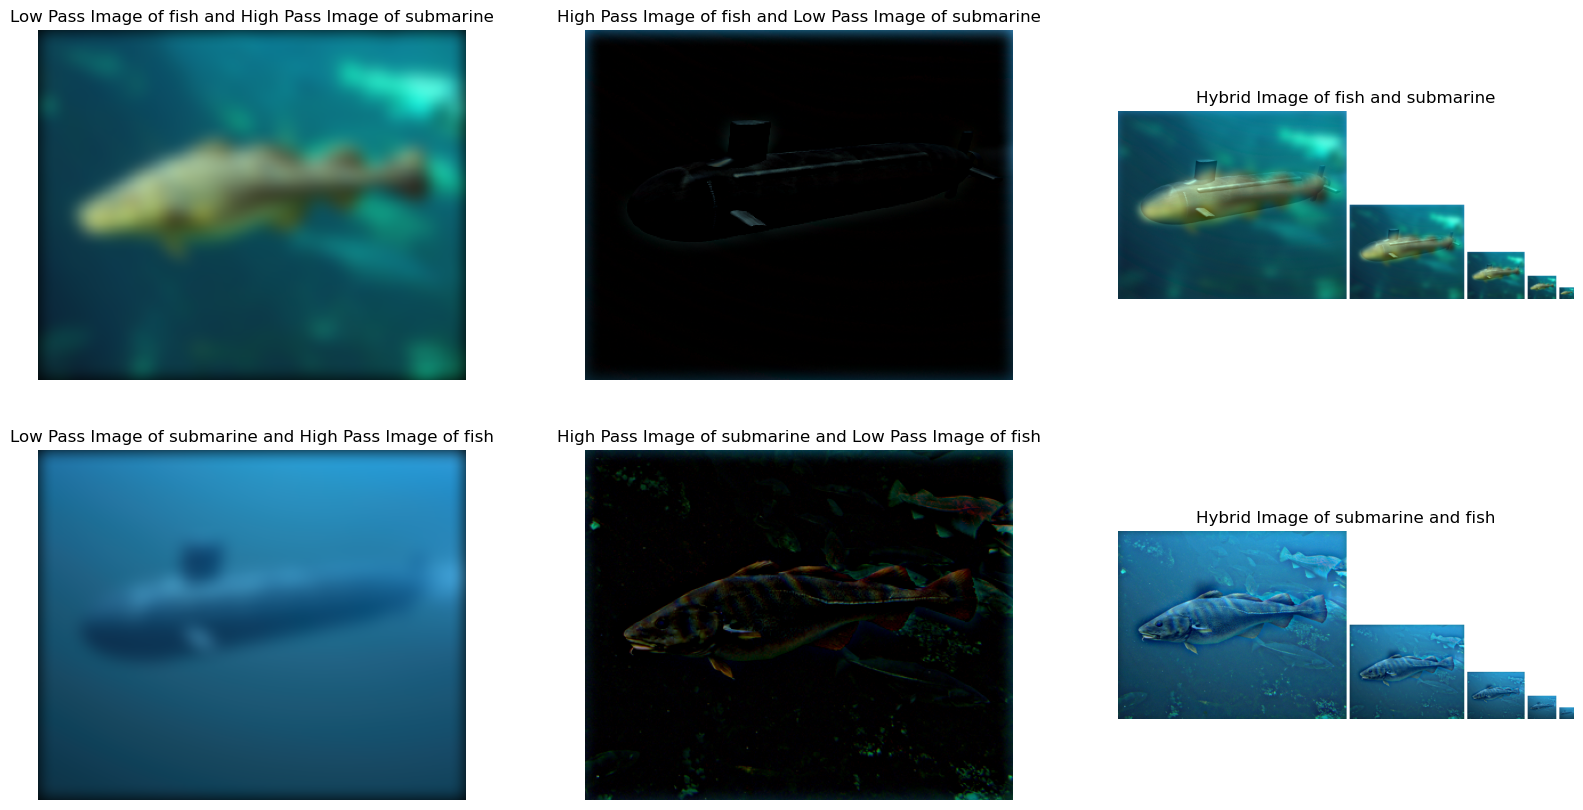

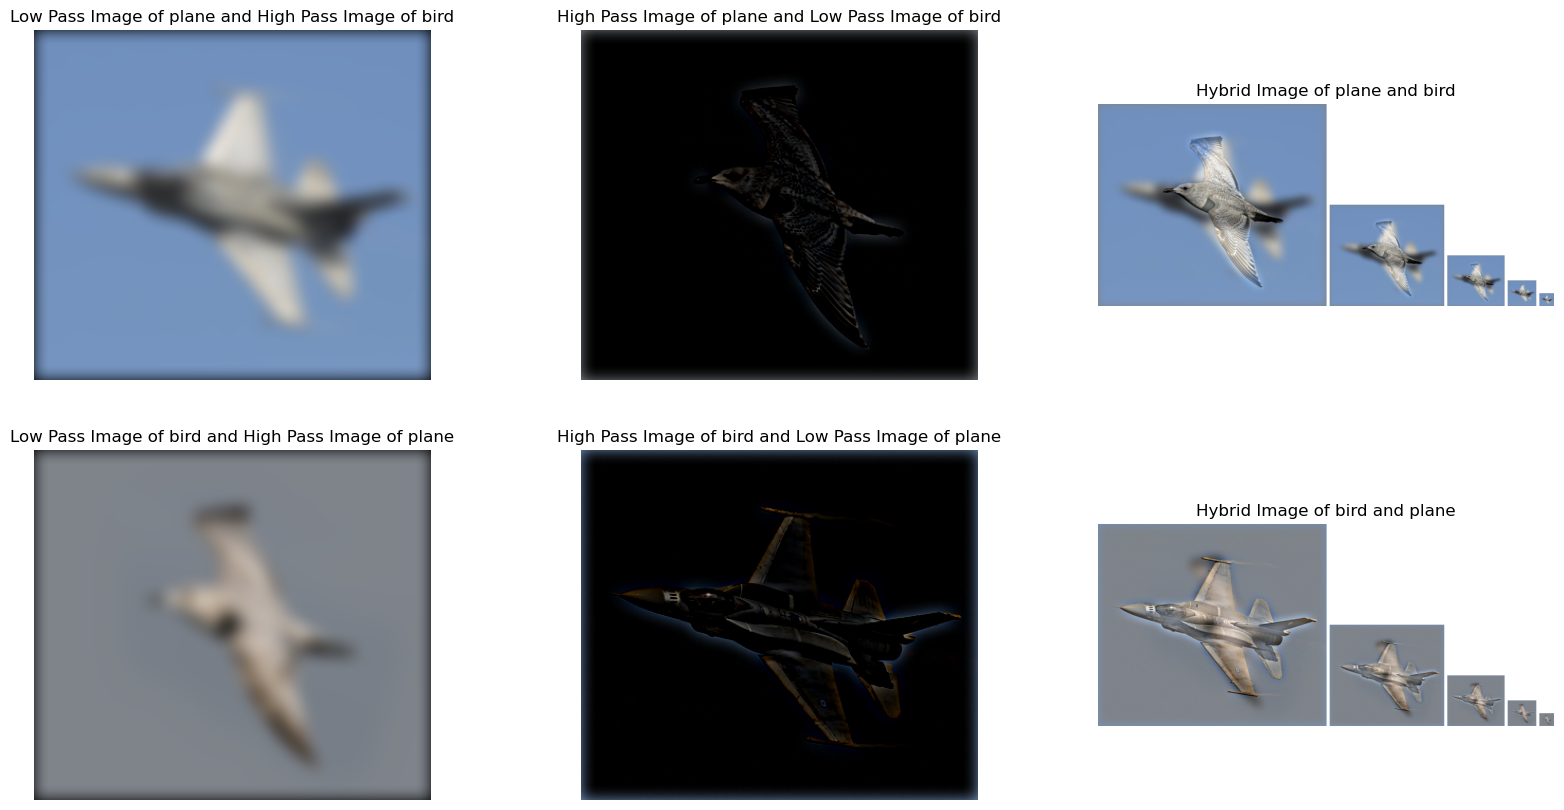

In [5]:
for pair in pairs:
    low1,high1,low2,high2,vis1,vis2,hybrid_image1,hybrid_image2=auto_hybrid(pair,filter)
    plt.figure(figsize=(20,10))
    plt.subplot(2,3,1)
    plt.imshow(low1)
    plt.title('Low Pass Image of '+
              extract_filename(pair[0])+' and High Pass Image of '+extract_filename(pair[1]))
    plt.axis('off')
    plt.subplot(2,3,2)
    plt.imshow(high1)
    plt.title('High Pass Image of '+
              extract_filename(pair[0])+' and Low Pass Image of '+extract_filename(pair[1]))
    plt.axis('off')
    plt.subplot(2,3,3)
    plt.imshow(vis1)
    plt.title('Hybrid Image of '+extract_filename(pair[0])+' and '+extract_filename(pair[1]))
    plt.axis('off')
    plt.subplot(2,3,4)
    plt.imshow(low2)
    plt.title('Low Pass Image of '+
              extract_filename(pair[1])+' and High Pass Image of '+extract_filename(pair[0]))
    plt.axis('off')
    plt.subplot(2,3,5)
    plt.imshow(high2)
    plt.title('High Pass Image of '+
              extract_filename(pair[1])+' and Low Pass Image of '+extract_filename(pair[0]))
    plt.axis('off')
    plt.subplot(2,3,6)
    plt.imshow(vis2)
    plt.title('Hybrid Image of '+extract_filename(pair[1])+' and '+extract_filename(pair[0]))
    plt.axis('off')
    plt.show

However, clearly, some of the hybrid images lack clarity and effective fusion, possibly due to improper alignment or suboptimal cutoff frequency settings.
Then in further study, we'll discuss about how to adjust the cutoff frequncy to improve the performance.

# Take one pair as instance
Let us take the photo of Einstein and Marilyn as an example.

<figure>
    <img src="../results/marilyn_low_einstein_high_hybrid.png" alt="Marilyn_low-Einstein_high ">
    <figcaption>Figure 1: Marilyn_low-Einstein_high Hybrid
    <img src="../results/einstein_low_marilyn_high_hybrid.png" alt="Marilyn_high-Einstein_low Hybrid">
    <figcaption>Figure 2: Marilyn_high-Einstein_low Hybrid</figcaption>
  Hybrid</figcaption>
  </figure>

- The high-pass filter captures facial details like hair, contours, and wrinkles, making them clear with high contrast.
- The low-pass filter keeps smooth areas like skin and background.

For the first hybrid image,

The high-pass filter comes from the first person's image. It captures facial details like hair, contours, and wrinkles, making them clear with high contrast.

The low-pass filter comes from the second person's image. It keeps smooth areas like skin and background.

In reverse fusion, 
Marilyn Monroe’s image is processed with a high-pass filter, keeping edges and details like wavy hair texture and facial contours. Einstein’s image is processed with a low-pass filter, keeping smooth areas like skin and background. 

When viewed up close, the image shows Marilyn Monroe’s detailed features, such as wavy hair and facial edges. When viewed from a distance, the image shows Einstein’s smooth features, such as overall skin tone and background.